In [26]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs
from mejiro.lenses import lens_util

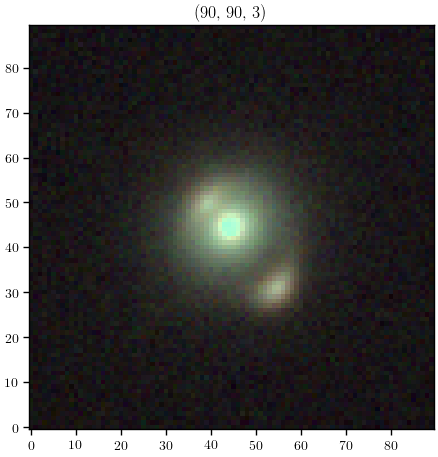

In [27]:
color_dir = config.machine.dir_05
pickle_dir = config.machine.dir_03
lens, rgb_model, rgb_image = lens_util.get_sample(pickle_dir, color_dir, 70)

plt.imshow(rgb_image)
plt.title(rgb_image.shape)
plt.show()

In [28]:
print(lens.z_lens, lens.z_source)

0.2902115249535011 0.5876899931818929


In [29]:
print(lens.lens_stellar_mass, lens.lens_vel_disp, lens.snr)

286796906929.3925 295.97270864848 None


In [35]:
print(lens.lens_model_list[:3])
pprint(lens.kwargs_lens[:3])

['SIE', 'SHEAR', 'CONVERGENCE']
[{'center_x': -0.007876281728887604,
  'center_y': 0.010633393703246008,
  'e1': 0.004858808997848661,
  'e2': 0.0075210751726143355,
  'theta_E': 1.168082477232392},
 {'dec_0': 0,
  'gamma1': -0.03648819840013156,
  'gamma2': -0.06511863424492038,
  'ra_0': 0},
 {'dec_0': 0, 'kappa': 0.06020941823541971, 'ra_0': 0}]


In [31]:
lens.kwargs_model['lens_model_list'] = lens.kwargs_model['lens_model_list'][:3]
lens.kwargs_model['lens_redshift_list'] = lens.kwargs_model['lens_redshift_list'][:3]

pprint(lens.kwargs_model)

{'cosmo': FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897),
 'lens_light_model_list': ['SERSIC_ELLIPSE'],
 'lens_model_list': ['SIE', 'SHEAR', 'CONVERGENCE'],
 'lens_redshift_list': [0.2902115249535011,
                        0.2902115249535011,
                        0.2902115249535011],
 'source_light_model_list': ['SERSIC_ELLIPSE'],
 'source_redshift_list': [0.5876899931818929],
 'z_source': 0.5876899931818929,
 'z_source_convention': 5}


In [32]:
lens.kwargs_params['kwargs_lens'] = lens.kwargs_params['kwargs_lens'][:3]

pprint(lens.kwargs_params)

{'kwargs_lens': [{'center_x': -0.007876281728887604,
                  'center_y': 0.010633393703246008,
                  'e1': 0.004858808997848661,
                  'e2': 0.0075210751726143355,
                  'theta_E': 1.168082477232392},
                 {'dec_0': 0,
                  'gamma1': -0.03648819840013156,
                  'gamma2': -0.06511863424492038,
                  'ra_0': 0},
                 {'dec_0': 0, 'kappa': 0.06020941823541971, 'ra_0': 0}],
 'kwargs_lens_light': [{'R_sersic': 0.5300707454127908,
                        'center_x': -0.007876281728887604,
                        'center_y': 0.010633393703246008,
                        'e1': 0.023377277902774978,
                        'e2': 0.05349948216860632,
                        'magnitude': 17.5664222662219,
                        'n_sersic': 4.0}],
 'kwargs_ps': None,
 'kwargs_source': [{'R_sersic': 0.1651633078964498,
                    'center_x': 0.30298310338567075,
                    '

In [33]:
pprint(lens.lens_mags)

{'F106': 17.5664222662219,
 'F129': 17.269983557132853,
 'F184': 17.00761457389914}


In [34]:
pprint(lens.source_mags)

{'F106': 21.434711611915137,
 'F129': 21.121205893763328,
 'F184': 20.542431041034558}
